<a href="https://colab.research.google.com/github/Manpreet102005/Airline-Flight/blob/main/Airline_Flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Airline-Flight/airlines_flights_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [23]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [21]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


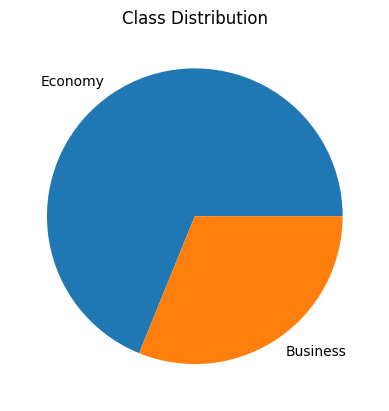

In [19]:
# class distribution
plt.pie(df['class'].value_counts(),labels=df['class'].value_counts().index,)
plt.title("Class Distribution")
plt.show()

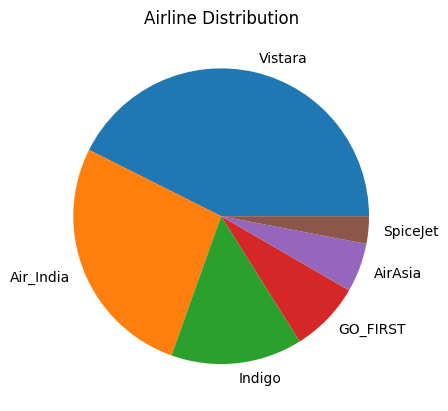

In [22]:
#airline distribution
plt.pie(df['airline'].value_counts(),labels=df['airline'].value_counts().index)
plt.title("Airline Distribution")
plt.show()

In [24]:
source_df=df.source_city.value_counts()
dest_df=df.destination_city.value_counts()

In [29]:
# No of flights from particular city
px.bar(source_df,x=source_df.index,y=source_df.values,title='No of flights from particular city',labels={'x':'City','y':'No of flights'})

In [30]:
# No of flights from particular city
px.bar(dest_df,x=dest_df.index,y=dest_df.values,title='No of flights to particular city',labels={'x':'City','y':'No of flights'})

In [32]:
# count of stops
px.bar(df['stops'].value_counts(),x=df['stops'].value_counts().index,y=df['stops'].value_counts().values,labels={'x':'Stops','y':'No of flights'},title='Count of stops')

In [37]:
#days left VS price
px.scatter(df.sample(1000),x='days_left',y='price',title='Days left VS Price')

In [41]:
df[df['duration']==49.83]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [42]:
#checking duplicate entries
df.duplicated().sum()

np.int64(0)

In [45]:
df.drop(columns=['index','flight'],axis=1,inplace=True)

In [49]:
#splitting
from sklearn.model_selection import train_test_split
train,test_df=train_test_split(df,test_size=0.2,random_state=123)
train_df,val_df=train_test_split(train,random_state=123,test_size=0.25)

In [50]:
train_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
5799,Indigo,Delhi,Early_Morning,one,Evening,Mumbai,Economy,8.67,30,2410
57942,GO_FIRST,Mumbai,Early_Morning,one,Afternoon,Bangalore,Economy,10.25,30,4081
76810,Vistara,Mumbai,Afternoon,one,Night,Hyderabad,Economy,10.50,46,3971
259389,Vistara,Bangalore,Evening,one,Morning,Chennai,Business,15.92,13,44280
215791,Vistara,Delhi,Evening,one,Evening,Bangalore,Business,25.08,49,45033
...,...,...,...,...,...,...,...,...,...,...
101969,Vistara,Bangalore,Early_Morning,one,Evening,Mumbai,Economy,8.50,45,6568
214324,Vistara,Delhi,Evening,one,Morning,Bangalore,Business,17.00,30,57017
176078,Vistara,Hyderabad,Night,one,Night,Kolkata,Economy,26.33,47,5960
243079,Air_India,Mumbai,Early_Morning,one,Night,Chennai,Business,16.50,24,49613


In [51]:
#selecting inputs
input_cols=list(train_df.columns[:-1])
target_col='price'

In [52]:
input_cols,target_col

(['airline',
  'source_city',
  'departure_time',
  'stops',
  'arrival_time',
  'destination_city',
  'class',
  'duration',
  'days_left'],
 'price')

In [64]:
x_train=train_df[input_cols].copy()
x_test=test_df[input_cols].copy()
x_val=val_df[input_cols].copy()
y_train=train_df[target_col].copy()
y_test=test_df[target_col].copy()
y_val=val_df[target_col].copy()

In [65]:
#numeric_cols
numeric_cols=list(x_train.select_dtypes('number'))
cat_cols=list(x_train.select_dtypes('object'))

In [66]:
numeric_cols,cat_cols

(['duration', 'days_left'],
 ['airline',
  'source_city',
  'departure_time',
  'stops',
  'arrival_time',
  'destination_city',
  'class'])

In [67]:
# scaling numeric_cols
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(x_train[numeric_cols])
x_train[numeric_cols]=scaler.transform(x_train[numeric_cols])
x_test[numeric_cols]=scaler.transform(x_test[numeric_cols])
x_val[numeric_cols]=scaler.transform(x_val[numeric_cols])


In [ ]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore').fit(x_train[cat_cols])
encoded_cols=encoder.get_feature_names_out(cat_cols)
encoded_cols

In [75]:
x_train[encoded_cols]=encoder.transform(x_train[cat_cols]).to_array()
x_test[encoded_cols]=encoder.transform(x_test[cat_cols]).toarray()
x_val[encoded_cols]=encoder.transform(x_val[cat_cols]).toarray()


In [76]:
x_train.drop(columns=cat_cols,inplace=True)
x_test.drop(columns=cat_cols,inplace=True)
x_val.drop(columns=cat_cols,inplace=True)

In [82]:
all_cols = numeric_cols + list(encoded_cols)

X_train = x_train[all_cols].copy()
X_test = x_test[all_cols].copy()
X_val = x_val[all_cols].copy()

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180091 entries, 5799 to 74255
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      180091 non-null  float64
 1   days_left                     180091 non-null  float64
 2   airline_AirAsia               180091 non-null  float64
 3   airline_Air_India             180091 non-null  float64
 4   airline_GO_FIRST              180091 non-null  float64
 5   airline_Indigo                180091 non-null  float64
 6   airline_SpiceJet              180091 non-null  float64
 7   airline_Vistara               180091 non-null  float64
 8   source_city_Bangalore         180091 non-null  float64
 9   source_city_Chennai           180091 non-null  float64
 10  source_city_Delhi             180091 non-null  float64
 11  source_city_Hyderabad         180091 non-null  float64
 12  source_city_Kolkata           180091 non-null  